In [2]:


def readFasta(filepath='data/full_dataset_sequences.fasta'):
    first = True
    max =0
    dataset = []
    with open(filepath) as fasta:
        for line in fasta:
            if line[0] == '>':
                if first:
                    first = False
                else:
                    dataset.append(entry)
                entry = {}
                header_tokens = line.split(' ')
                entry['id'] = header_tokens[0].replace('>','').split('_')[0]
                entry['header'] = line.replace('\n', '')
                entry['temp'] = float(header_tokens[1].split('=')[1].replace('\n',''))
                entry['sequence'] = ''
            else:
                entry['sequence'] = entry['sequence'] + line.replace('\n','')
                max = len(entry['sequence']) if len(entry['sequence'])> max else max
    
    return dataset

dataset = readFasta()




# Display thermo distribution

Max sequence len:  <built-in function max>
Thermostability distribution


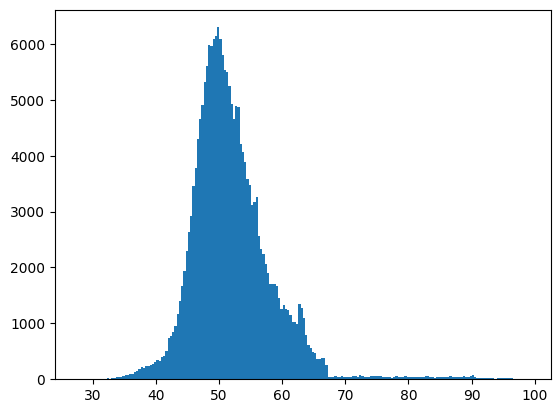

seq len distribution


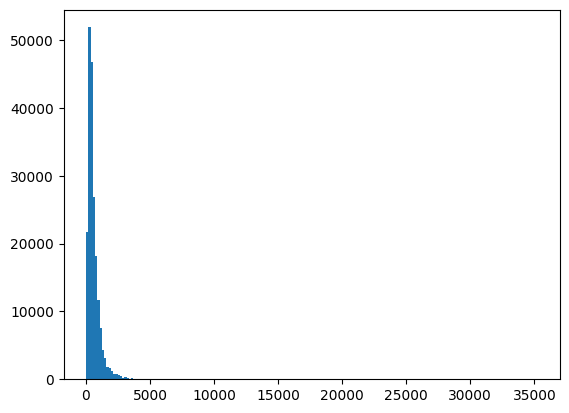

Total entries in ds:  201282
Unique sequences in ds:  34158
Total entries in seqLenConstrainedDs (maxSeqLen: 700):  144096
Unique sequences in seqLenConstrainedDs (maxSeqLen: 700):  26925


In [3]:
import numpy as np
import scipy.stats as stats
import pylab as pl
print("Max sequence len: ", max)
def plotDistribution(h: "list[float]"):
    mean = np.mean(h)
    std = np.std(h)
    fit = stats.norm.pdf(h, mean, std)  #this is a fitting indeed
    #pl.plot(h,fit,'-o')
    pl.hist(h, bins=200)      #use this to draw histogram of your data
    pl.show()                   #use may also need add this 
h = [entry["temp"] for entry in dataset]
print("Thermostability distribution")
plotDistribution(h)

print("seq len distribution")
plotDistribution([len(entry["sequence"]) for entry in dataset])


print("Total entries in ds: ", len(dataset))
uniqueSeqs = set([entry["sequence"] for entry in dataset])
print("Unique sequences in ds: ", len(uniqueSeqs))

maxLen = 700
seqLenConstrainedDs = [entry for entry in dataset if len(entry["sequence"]) <= maxLen]
print(f"Total entries in seqLenConstrainedDs (maxSeqLen: {maxLen}): ", len(seqLenConstrainedDs))
uniqueSeqs = set([entry["sequence"] for entry in seqLenConstrainedDs])
print(f"Unique sequences in seqLenConstrainedDs (maxSeqLen: {maxLen}): ", len(uniqueSeqs))

# Distribution of melting point differences of unique sequences

Preparing mean calculation
Calciulating mean
Calculating diffs
Plotting


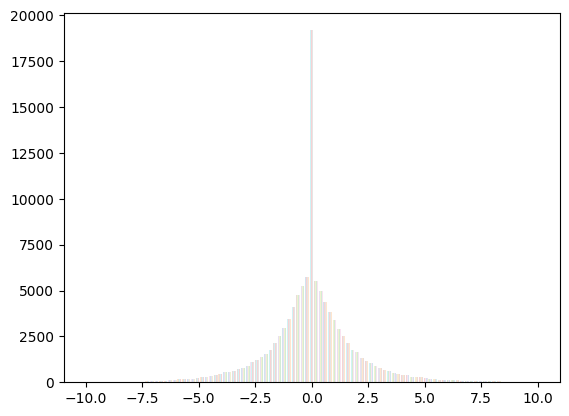

In [3]:
from matplotlib import pyplot
import pandas as pd


bins = np.linspace(-10, 10, 100)

def hist(x, label):
    pyplot.hist(x, bins, alpha=0.5, label=label)

means_pre = dict.fromkeys(uniqueSeqs, (0, 0))
print("Preparing mean calculation")
for entry in seqLenConstrainedDs:
    sum, n = means_pre[entry["sequence"]]
    means_pre[entry["sequence"]] = (sum+entry["temp"], n + 1)


print("Calciulating mean")
means = {}
for key, (sum, n) in means_pre.items():
    means[key] = sum/n

diffs = dict.fromkeys(uniqueSeqs, [])

print("Calculating diffs")
for entry in seqLenConstrainedDs:
    d =means[entry["sequence"]] - entry["temp"]
    diffs[entry["sequence"]].append(d)

print("Plotting")
numPlots = 1000
pyplot.hist(list(diffs.values())[:numPlots], bins, alpha=0.2, label=[str(key) for key in list(diffs.keys())[:numPlots]])
#for i,seq in enumerate(uniqueSeqs):
#    hist(diffs[seq], str(i))
#    if i==10: 
#        break


#pyplot.legend(loc='upper right')
pyplot.show()

# Count once occuring sequences

In [6]:
nums = dict.fromkeys(uniqueSeqs, 0)
thermos = dict.fromkeys(uniqueSeqs, [])
for entry in seqLenConstrainedDs:
    nums[entry["sequence"]] +=1
    thermos[entry["sequence"]].append(entry["temp"])

numOnceOccuring = 0
numMultiple = 0

maxDiff = 2

for count in nums.values():
    if count == 1: 
        numOnceOccuring+=1
    elif count>1: 
        numMultiple+=1

numWithinRange = 0
for t in thermos.values():
    if np.max(t) - min(t)<=maxDiff:
        numWithinRange+=1


print(f"Num unique sequences with max len {maxLen} occuring once:", numOnceOccuring)
print(f"Num unique sequences with max len {maxLen} occuring more than once:", numMultiple)
print(f"Num unique sequences with max len {maxLen} having occurances with max temp. diff of {maxDiff}:", numWithinRange)

Num unique sequences with max len 500 occuring once: 13426
Num unique sequences with max len 500 occuring more than once: 7957
Num unique sequences with max len 500 having occurances with max temp. diff of 2: 7957


In [ ]:
dataset[:3]

[{'id': 'A0A023T4K3',
  'header': '>A0A023T4K3_Caenorhabditis_elegans_lysate MELTING_POINT=37.9629473421417',
  'temp': 37.9629473421417,
  'sequence': 'MSGEEEKAADFYVRYYVGHKGKFGHEFLEFEFRPNGSLRYANNSNYKNDTMIRKEATVSESVLSELKRIIEDSEIMQEDDDNWPEPDKIGRQELEILYKNEHISFTTGKIGALADVNNSKDPDGLRSFYYLVQDLKCLVFSLIGLHFKIKPI'},
 {'id': 'A0A023T778',
  'header': '>A0A023T778_Mus_musculus_BMDC_lysate MELTING_POINT=54.4253424806097',
  'temp': 54.4253424806097,
  'sequence': 'MSMGSDFYLRYYVGHKGKFGHEFLEFEFRPDGKLRYANNSNYKNDVMIRKEAYVHKSVMEELKRIIDDSEITKEDDALWPPPDRVGRQELEIVIGDEHISFTTSKIGSLIDVNQSKDPEGLRVFYYLVQDLKCLVFSLIGLHFKIKPI'},
 {'id': 'A0A061ACF5',
  'header': '>A0A061ACF5_Caenorhabditis_elegans_lysate MELTING_POINT=49.4592155176475',
  'temp': 49.4592155176475,
  'sequence': 'MRICFLLLAFLVAETFANELTRCCAGGTRHFKNSNTCSSIKSEGTSMTCQRAASICCLRSLLDNACDSGTDIAKEEESCPSNINILGGGLKKECCDCCLLAKDLLNRNEPCVAPVGFSAGCLRSFNKCCNGDIEITHASEIITGRPLNDPHVLHLGDRCASSHCEHLCHDRGGEKVECSCRSGFDLAPDGMACVDIDECATLMDDCLESQRCLNTPGSFKCIRTLSCGTGYAMDSETE

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
eval_ids = set()
with open('data/uniref201803_ur50_valid_headers.txt') as txt_file:
    for line in txt_file:
        id = line.split('_')[1].replace('\n','')
        eval_ids.add(id)
print(iter(eval_ids))

In [ ]:
eval_ds = []
train_ds = []

for entry in dataset:
    if entry['id'] in eval_ids:
        eval_ds.append(entry)
    else:
        train_ds.append(entry)

eval_ds[:3]

[{'id': 'A0A078BPG0',
  'header': '>A0A078BPG0_Caenorhabditis_elegans_lysate MELTING_POINT=41.1098418725276',
  'temp': 41.1098418725276,
  'sequence': 'MSALFQEVKGRQQDFMKAFNAGDAAGAASVYDPDGYFMPNGRNPVKGRSGIEAYFKEDMADGVQTAQIITEEVNGGGDWAFERGSYHLDGTKGRESGAYLQIWKKVEGVWLIHNDCFNVIKNAC'},
 {'id': 'A0A0A6YWP2',
  'header': '>A0A0A6YWP2_Mus_musculus_BMDC_lysate MELTING_POINT=42.1985268328721',
  'temp': 42.1985268328721,
  'sequence': 'MEALKVEKFTTANRGNGLRAVAPLRPGELLFRSDPLAYTVCKGSRGVVCDRCLLGKVVWERAAWLSSEPENI'},
 {'id': 'A0A0K2HAP7',
  'header': '>A0A0K2HAP7_Geobacillus_stearothermophilus_NCA26_lysate MELTING_POINT=72.3790995873377',
  'temp': 72.3790995873377,
  'sequence': 'MHQEIEIELKNLLTAAEFAAVRAAFRLDDGAFFRQENHYFDTPSFALKERAAALRIRAKEGRLTLTLKQTRADGTILEIHEPLSLSEAEAWLAGIAAPRGAIADLLAELGINPHEVRCFGSLVTDRAEWPHEGGTLCLDHNCYLQSEDYELEYEVDHVEAGEKRFLRLLEALGIPRRPAPNKIARFYARMKEMEERR'}]

In [ ]:
def write_to_fasta(filename: str, ds: list):
    with open(f"data/{filename}", 'w') as f_fasta:
        for entry in ds:
            f_fasta.write(entry['header'] + ' ' + entry['sequence'] + '\n')

In [ ]:
write_to_fasta('eval_sequences.fasta', eval_ds)
write_to_fasta('train_sequences.fasta', train_ds)

# Count sequences belonging to same cluster but different set

In [28]:
maxSeqLen = 700
def extractIdsFromDs(ds):
   return set([entry["header"].split()[0][1:] for entry in ds if len(entry["sequence"])<=maxSeqLen])

def extractSequenceFromDs(ds):
   return set([entry["sequence"] for entry in ds if len(entry["sequence"])<=maxSeqLen])

idToSeq = {}
for entry in readFasta("data/full_dataset_sequences.fasta"):
  id = entry["header"].split()[0][1:]
  idToSeq[id] = entry["sequence"]   

evalDs = readFasta("data/eval_sequences.fasta")
trainDs = readFasta("data/train_sequences.fasta")

evalIds = extractIdsFromDs(evalDs)
trainIds = extractIdsFromDs(trainDs)

evalSeqs = extractSequenceFromDs(evalDs)
trainSeqs = extractSequenceFromDs(trainDs)

evalClusterIds = set()
trainClusterIds = set()

numClustersWithoutProtein = 0
clusteredProteinIds = set()

clusters = {}
with open("data/meltome_PIDE20_clusters.tsv", "r") as f:
    firstLine = True
    for line in f:
        if firstLine:
          firstLine = False
          continue   
        clusterId, proteinId = line.replace("\n", "").split("\t")
        #print("clusterid", clusterId, "proteinId", proteinId)
        
        if clusterId in clusters:
           clusters[clusterId].add(proteinId)
        else: 
           clusters[clusterId] = set([proteinId])

        clusteredProteinIds.add(proteinId)
        if proteinId in evalIds:
          evalClusterIds.add(clusterId)
        elif proteinId in trainIds:
          trainClusterIds.add(clusterId)
        else:
           #print(proteinId)
           numClustersWithoutProtein +=1
print("Unique train seqs before filtering", len(trainSeqs))
numMustBeRemovedFromEval = 0
numMustBeRemovedFromTrain = 0
numOccurences = 0
for clusterId, proteinids in clusters.items():
  numTrain = 0
  numEval = 0
  for proteinId in proteinids:
    if proteinId in trainIds:
      numTrain += 1
    elif proteinId in evalIds: 
      numEval += 1
  
  if numEval > 0 and numTrain>0:
     numMustBeRemovedFromEval += numEval
     numMustBeRemovedFromTrain += numTrain
     numOccurences += 1
     for proteinId in proteinids:
      if idToSeq[proteinId] in trainSeqs:
        trainSeqs.remove(idToSeq[proteinId])

print("Unique train seqs after filtering", len(trainSeqs))
print("Cluster items", len(clusters.items()))      

print("Num trainIds", len(trainIds), "Num evalIds", len(evalIds))
print("Num clusters without protein in our ds: ", numClustersWithoutProtein)
print("Num intersections:", len(evalClusterIds.intersection(trainClusterIds)))
print("Num not intersecting clusters:", len(evalClusterIds.difference(trainClusterIds))+len(trainClusterIds.difference(evalClusterIds)))
print("Num protein ids of our ds not clustered:", len(evalClusterIds.union(trainClusterIds).difference(clusteredProteinIds)))
print("Num eval protein ids", len(evalIds))
print("Num eval protein ids that must be removed if avoiding cluster data leakage:",numMustBeRemovedFromEval, "data leakage occuring for ", numOccurences, "clusters")
print("OR Num train protein ids that must be removed if avoiding cluster data leakage:",numMustBeRemovedFromTrain)
print("Num train protein ids", len(trainIds))

Unique train seqs before filtering 25234
Unique train seqs after filtering 20072
Cluster items 15666
Num trainIds 57630 Num evalIds 4858
Num clusters without protein in our ds:  57187
Num intersections: 991
Num not intersecting clusters: 11497
Num protein ids of our ds not clustered: 0
Num eval protein ids 4858
Num eval protein ids that must be removed if avoiding cluster data leakage: 3873 data leakage occuring for  991 clusters
OR Num train protein ids that must be removed if avoiding cluster data leakage: 12202
Num train protein ids 57630
